In [ ]:
## importing important libraries

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, normalize
from keras.utils import to_categorical
## code is used to display all the datasets and not just part of it
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/03-02-2018.csv')

In [ ]:
data.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.423429e+03,8.049848e+00,1.151421e+07,5.887282e+00,6.983180e+00,3.920838e+02,5.271275e+03,2.104312e+02,8.249200e+00,5.461640e+01,...,2.044231e+00,1.745403e+01,1.229579e+05,6.130972e+04,1.905231e+05,8.305446e+04,4.781197e+06,1.064224e+05,4.863777e+06,4.677017e+06
std,1.516176e+04,4.432629e+00,3.012113e+07,8.903317e+01,2.129580e+02,2.159779e+03,3.088768e+05,2.669497e+02,2.094972e+01,5.762840e+01,...,1.392463e+01,5.179526e+00,2.083099e+06,1.261694e+06,2.761456e+06,1.759832e+06,1.741308e+07,1.462605e+06,1.756808e+07,1.733303e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,5.160000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.389000e+03,6.000000e+00,1.124200e+04,3.000000e+00,1.000000e+00,6.300000e+01,1.290000e+02,4.600000e+01,0.000000e+00,4.000000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.080000e+03,6.000000e+00,2.210150e+06,7.000000e+00,5.000000e+00,3.650000e+02,5.820000e+02,3.260000e+02,0.000000e+00,1.086667e+02,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,1.711000e+03,1.460000e+03,1.460000e+03,...,9.262000e+03,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


In [ ]:
data.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd

In [ ]:
data['Label'].unique()

data['Label'] = LabelEncoder().fit_transform(data['Label'])

array(['Benign', 'Bot'], dtype=object)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1234,8080,6,16079,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1235,8080,6,577,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1236,8080,6,10279,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1237,8080,6,457,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1240,8080,6,10271,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356594,0,0,9487,10,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
356709,51395,6,1030059,4,2,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
356768,51397,6,1029998,4,2,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
357370,51396,6,1030017,4,2,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<Axes: >

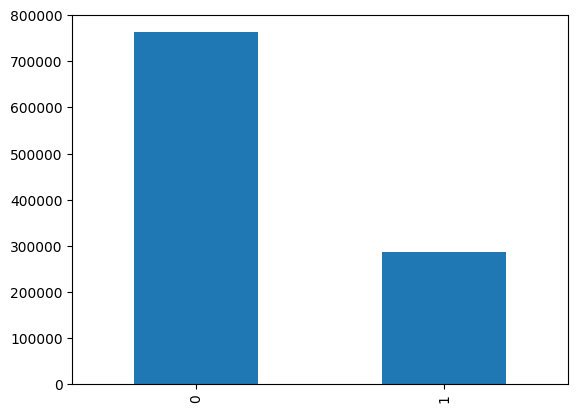

In [ ]:
data[data['Label'] == 1]

data['Label'].value_counts().plot.bar()

In [ ]:
# data_norm = normalize(data)

# data = data.fillna(0)
# data[np.isinf(data)].value_counts()

columns = data.columns
# print(columns)

for i in columns:
	# column_max = data[i].max
	data[i] = data[i].fillna(0)
	data[i] = data[i].replace(np.Infinity, 1)
	# data[i] = data[i].replace(np.infinity, column_max)

In [ ]:
features = []
for i in data.columns:
  if i == "Label":
    continue
  features.append(i)

# features = data[:-2]
# normalized_data = normalize(features)

normalized_data = normalize(data[features])

In [ ]:
tmp1 = pd.DataFrame(normalized_data, columns = features)

final_data = pd.concat([tmp1, data['Label']], axis=1)



In [ ]:
final_data.describe(include='all')

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.760135e-01,1.453586e-04,2.558498e-01,4.408679e-05,1.474860e-05,1.043931e-03,8.622588e-04,9.893185e-04,7.840741e-05,3.795850e-04,...,4.038243e-04,1.151631e-03,3.663956e-04,1.549532e-03,9.129956e-04,2.313910e-02,7.538531e-04,2.371782e-02,2.244817e-02,2.729333e-01
std,3.032251e-01,2.545455e-04,2.221280e-01,7.671380e-05,4.358197e-05,2.372244e-03,3.458201e-03,2.293890e-03,8.682898e-04,1.106802e-03,...,8.412501e-04,1.392478e-02,7.101961e-03,1.725574e-02,1.242320e-02,7.482990e-02,9.295915e-03,7.637883e-02,7.394733e-02,4.454670e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,3.231519e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.251471e-04,1.393680e-06,1.804162e-02,1.890684e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.604254e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.519531e-04,5.760866e-05,2.250545e-01,7.758807e-06,1.696033e-06,1.534758e-04,2.133380e-04,1.006008e-04,0.000000e+00,2.514998e-05,...,5.243699e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.623823e-01,1.310624e-04,4.871025e-01,5.861768e-05,9.387034e-06,3.863661e-04,7.363130e-04,2.946805e-04,0.000000e+00,2.340810e-04,...,3.930983e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999998e-01,1.245365e-02,8.051693e-01,5.752195e-03,3.834875e-03,2.281166e-01,6.810109e-01,1.054454e-01,1.054454e-01,1.054454e-01,...,4.151216e-02,4.165534e-01,3.042589e-01,4.434164e-01,4.165534e-01,4.333634e-01,3.118054e-01,4.853347e-01,4.333634e-01,1.000000e+00


In [ ]:
sample_final_data = final_data.copy()
sample_final_data.drop(['CWE Flag Count','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg'],axis=1,inplace=True)

In [ ]:
sample_final_data.shape

(1048575, 68)

In [ ]:
sample_final_data.std(axis=1)

0          0.115469
1          0.120276
2          0.114755
3          0.120135
4          0.114491
             ...   
1048570    0.116775
1048571    0.116672
1048572    0.116607
1048573    0.116750
1048574    0.116705
Length: 1048575, dtype: float64

In [ ]:
sample_final_data.describe(include='all')

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.760135e-01,1.453586e-04,2.558498e-01,4.408679e-05,1.474860e-05,1.043931e-03,8.622588e-04,9.893185e-04,7.840741e-05,3.795850e-04,...,4.038243e-04,1.151631e-03,3.663956e-04,1.549532e-03,9.129956e-04,2.313910e-02,7.538531e-04,2.371782e-02,2.244817e-02,2.729333e-01
std,3.032251e-01,2.545455e-04,2.221280e-01,7.671380e-05,4.358197e-05,2.372244e-03,3.458201e-03,2.293890e-03,8.682898e-04,1.106802e-03,...,8.412501e-04,1.392478e-02,7.101961e-03,1.725574e-02,1.242320e-02,7.482990e-02,9.295915e-03,7.637883e-02,7.394733e-02,4.454670e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,3.231519e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.251471e-04,1.393680e-06,1.804162e-02,1.890684e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.604254e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.519531e-04,5.760866e-05,2.250545e-01,7.758807e-06,1.696033e-06,1.534758e-04,2.133380e-04,1.006008e-04,0.000000e+00,2.514998e-05,...,5.243699e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.623823e-01,1.310624e-04,4.871025e-01,5.861768e-05,9.387034e-06,3.863661e-04,7.363130e-04,2.946805e-04,0.000000e+00,2.340810e-04,...,3.930983e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.999998e-01,1.245365e-02,8.051693e-01,5.752195e-03,3.834875e-03,2.281166e-01,6.810109e-01,1.054454e-01,1.054454e-01,1.054454e-01,...,4.151216e-02,4.165534e-01,3.042589e-01,4.434164e-01,4.165534e-01,4.333634e-01,3.118054e-01,4.853347e-01,4.333634e-01,1.000000e+00


In [ ]:
X_train, X, y_train, y = train_test_split(data.drop('Label'), data.Label, test_size=.4, shuffle=True)

In [ ]:
plt.hist(sample_final_data.drop('Label', axis=1), bins='auto')

In [ ]:
plt.matshow(sample_final_data.drop('Label').corr())

NameError: name 'plt' is not defined